## Regression

    Simple Linear Regression   (Normal Equation)
    
    Stochastic Gradient Descent Linear Regression (optimize MSE)
    
    Polynomial Regression (transform features to d dimension)

## Regularization 

y -> price(y1), no_rooms(y2)

    X -> bedrooms, population, area, distance city, ....

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline 

Build a machine learning model to predict milege of a car given by it's different features like cylinders, displacement, horsepower, weight, accerlration

    use seaborn mpg data set
    
    
    key points -> 
        
        Peform EDA to understand features and their importance in task 
        
        Create a Data pipeline to Preprocess data before passing to ML model
        
        Build a Machine Learning Model and hyper tune it to make model accuracy above 90%
        
        

In [7]:
mpg = sns.load_dataset('mpg').dropna()

In [8]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [9]:
y = mpg['mpg']
X = mpg[["displacement", "horsepower", "weight", "acceleration"]]

### EDA 

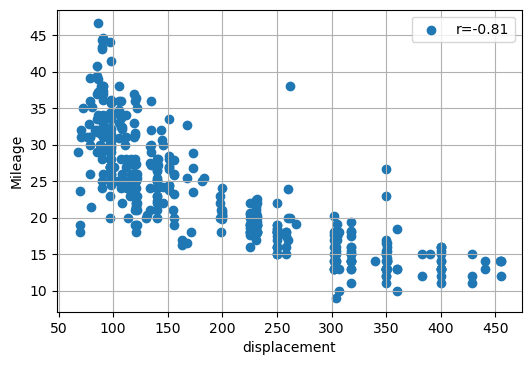

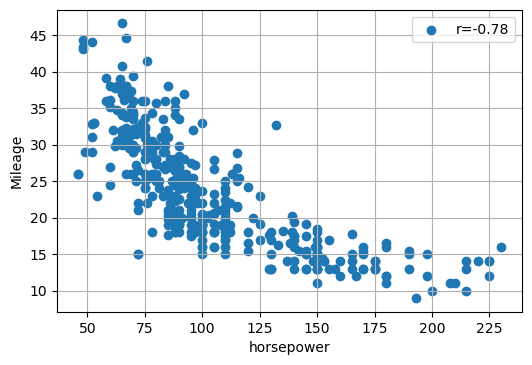

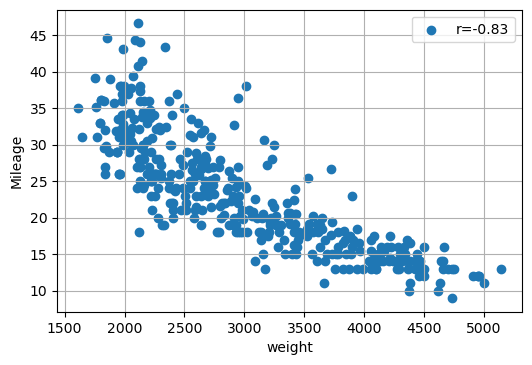

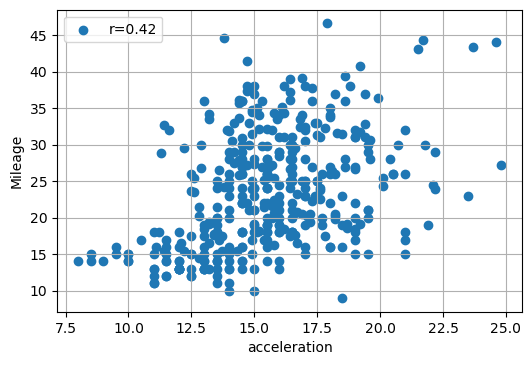

In [14]:
for feature in X:
    plt.figure(dpi=100)
    r = np.corrcoef(X[feature], y)[0, 1]
    plt.scatter(X[feature], y, label=f"r={r:0.2f}")
    plt.xlabel(feature)
    plt.ylabel("Mileage")
    plt.grid()
    plt.legend()
    plt.show()

### Bias

    if you choose to fit a linear model in this data than you know your linear will not
    perform well on training data which will make training error very high means your model
    will underfit this data,
    
        so we can this model has high bias 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X, y)

LinearRegression()

In [18]:
y_hat = model.predict(X)

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
def rmse(y, y_hat):
    return np.sqrt(mean_squared_error(y, y_hat))

In [21]:
print(f"Training Accuracy: {r2_score(y, y_hat):.2f}")
print(f"Training Error   : {rmse(y, y_hat):.2f}")

Training Accuracy: 0.71
Training Error   : 4.22


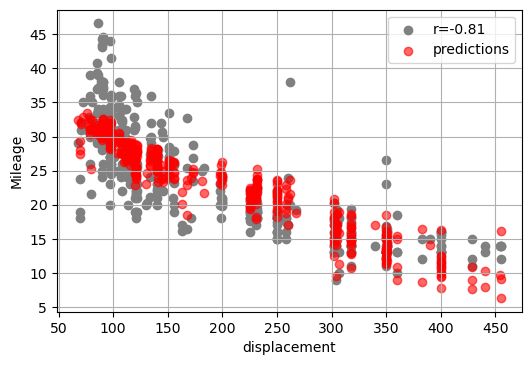

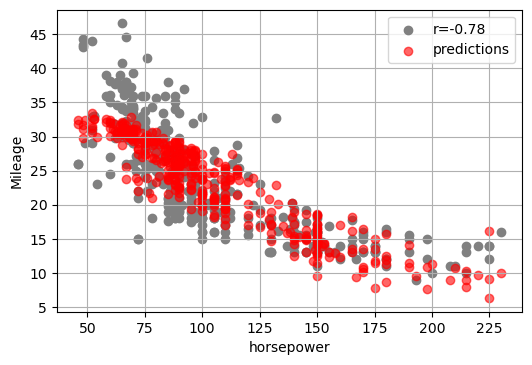

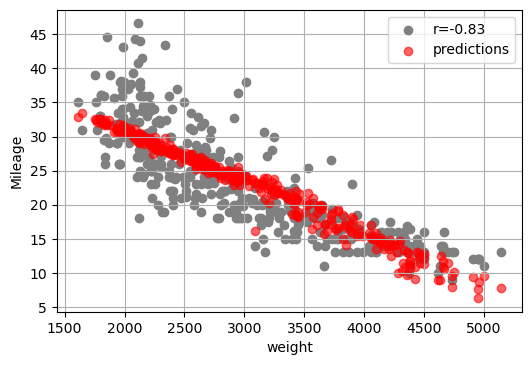

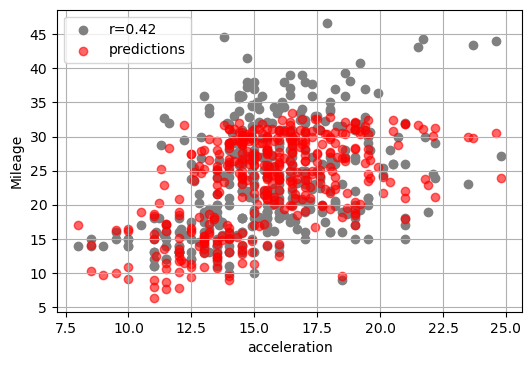

In [28]:
for feature in X:
    plt.figure(dpi=100)
    r = np.corrcoef(X[feature], y)[0, 1]
    plt.scatter(X[feature], y, label=f"r={r:0.2f}", color='gray')
    plt.scatter(X[feature], y_hat, label="predictions", color='red', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Mileage")
    plt.grid()
    plt.legend()
    plt.show()
    
print(f"Training Accuracy: {r2_score(y, y_hat):.2f}")
print(f"Training Error   : {rmse(y, y_hat):.2f}")

### High bias and low variance 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Training Accuracy: 0.77
Training Error   : 3.76


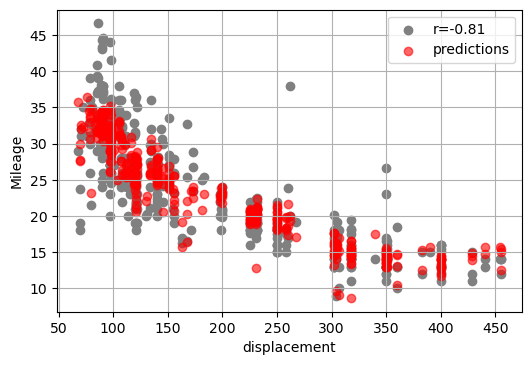

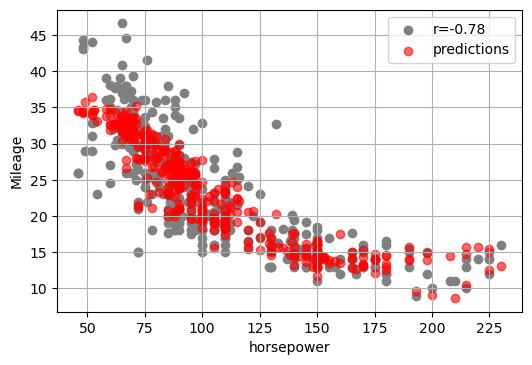

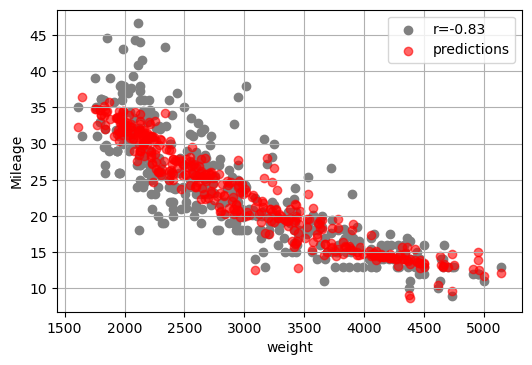

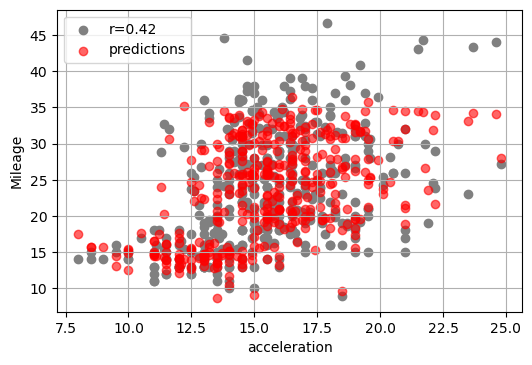

In [34]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])
model.fit(X, y)
y_hat = model.predict(X)
print(f"Training Accuracy: {r2_score(y, y_hat):.2f}")
print(f"Training Error   : {rmse(y, y_hat):.2f}")
for feature in X:
    plt.figure(dpi=100)
    r = np.corrcoef(X[feature], y)[0, 1]
    plt.scatter(X[feature], y, label=f"r={r:0.2f}", color='gray')
    plt.scatter(X[feature], y_hat, label="predictions", color='red', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Mileage")
    plt.grid()
    plt.legend()
    plt.show()
    


Training Accuracy: 0.81
Training Error   : 3.44


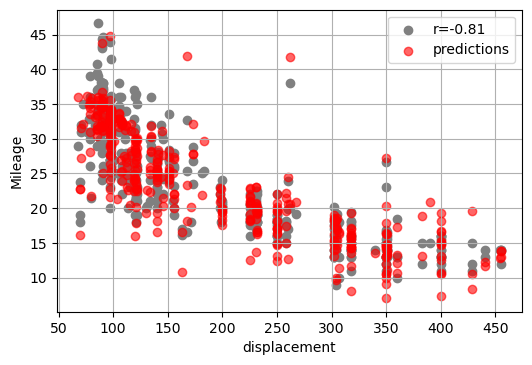

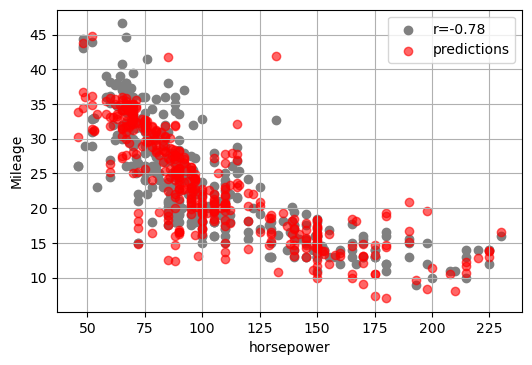

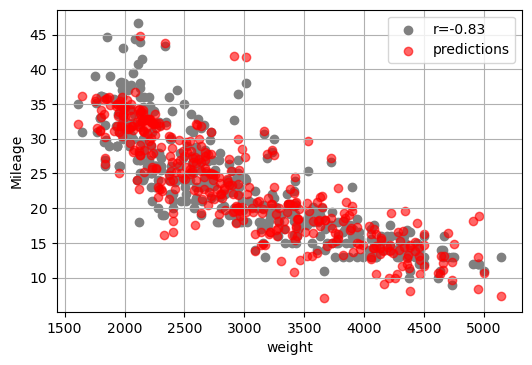

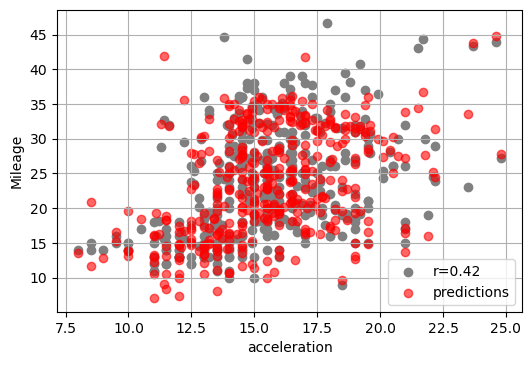

In [39]:
model = Pipeline([
    ('poly', PolynomialFeatures(degree=7, include_bias=False)),
    ('model', LinearRegression())
])
model.fit(X, y)
y_hat = model.predict(X)
print(f"Training Accuracy: {r2_score(y, y_hat):.2f}")
print(f"Training Error   : {rmse(y, y_hat):.2f}")
for feature in X:
    plt.figure(dpi=100)
    r = np.corrcoef(X[feature], y)[0, 1]
    plt.scatter(X[feature], y, label=f"r={r:0.2f}", color='gray')
    plt.scatter(X[feature], y_hat, label="predictions", color='red', alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Mileage")
    plt.grid()
    plt.legend()
    plt.show()
    


### Regularization of Linear Models

    controlling model parameters so that we can find a resonalbe good fit and avoid underfitted or overfitted models

### Simple Linear Regression
    
    Normal Equation 
    
    
### Stochastic Gradient Descent Linear Regression 

    reducing MSE error by updating weights using gradients

### Ridge Regression 

    Tikhonov Regularization
    
    
    we add a l2 norm of weights to our cost function to make weights as low as possible at each iterations
    so that we can reduce chances of overfitting 
    
    
$ {{||\theta||}_2 = \alpha \sum\limits_{i=0}^n \theta_i }$


${||\theta||}_2$ is `l2 norm of weights` or `l2 penalty` is also known as regularization term, and $\alpha$ is your regularization hyper parameter 


$ J\theta = MSE \theta + \alpha \sum\limits_{i=0}^n \theta_i $

In [40]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

## No Regularization

    always scale your data whenever you appling Regularization

In [41]:
linear_model = Ridge(alpha=0) # it is equal LinearRegression Model
sgd_model    =  SGDRegressor(penalty=None) # it is non - regularized SGD model

#### Regularized Model

    

In [42]:
linear_model = Ridge(alpha=0.4)
sgd_model = SGDRegressor(penalty='l2', alpha=0.1)

    alpha is a regularization hyper parameter by which we can control degree of freedom or we can regulate our model

    if model is overfitting than increase value of alpha to regularize it 
    

#### Irreducible Error 

    Error due to unprocessed data, low quality data
    
    to fix this we need to preprocess our data well
    
        means try to remove outliers
        
        check that you are scaling your data
        
        try to collect more data or may add some more features to your data
        
        

### Try to learn Lasso and Elastic Net 


### Classification Models 

    logistic Regression



### Metrices of Classification

    SGD -> classification
    
    DT -> Regression, classification

#### Regression PPT


    Model -> 
    
        Estimation Funciton / prediction / hypothesis
        
        Cost Function 
        
        Evaluation Metric 
        
        Regularization 
        
            Ridge
            Lasso
            Elastic Net
            
            
        Hyper-parameters 
        
            model hyper parameters
            
            regularization hyper parameter
            
        Uscases 

Types of Machine Learning

    Supervise Machine Learning
    
        Regression

        Classification
        
    Unsupervise Machine Learning
    
        Clustering

        Dimensionality Reduction